In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.metrics import confusion_matrix
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/personal-key-indicators-of-heart-disease/heart_2020_cleaned.csv


In [2]:
df = pd.read_csv('../input/personal-key-indicators-of-heart-disease/heart_2020_cleaned.csv')
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


**Check the missing values**

In [3]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

**Visualizing for some features**

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

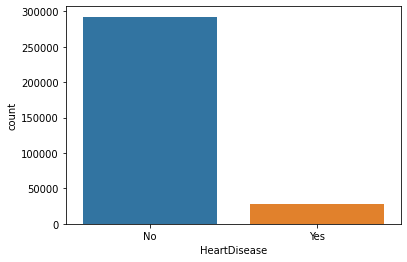

In [5]:
sns.countplot(df['HeartDisease'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


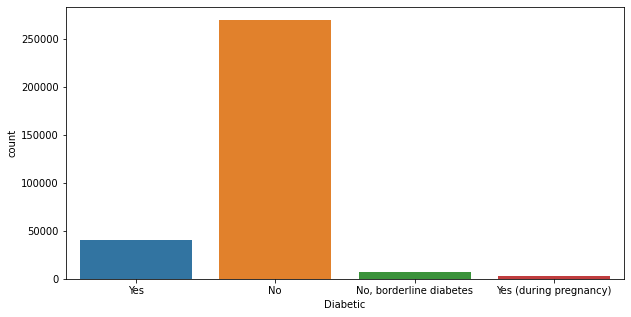

In [6]:
plt.figure(figsize=(10,5))
sns.countplot(df['Diabetic'])
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='AlcoholDrinking', ylabel='count'>

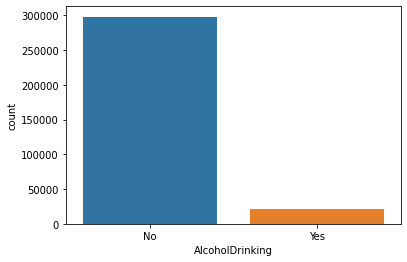

In [7]:
sns.countplot(df['AlcoholDrinking'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='BMI'>

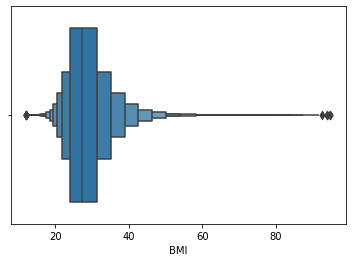

In [8]:
sns.boxenplot(df['BMI'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


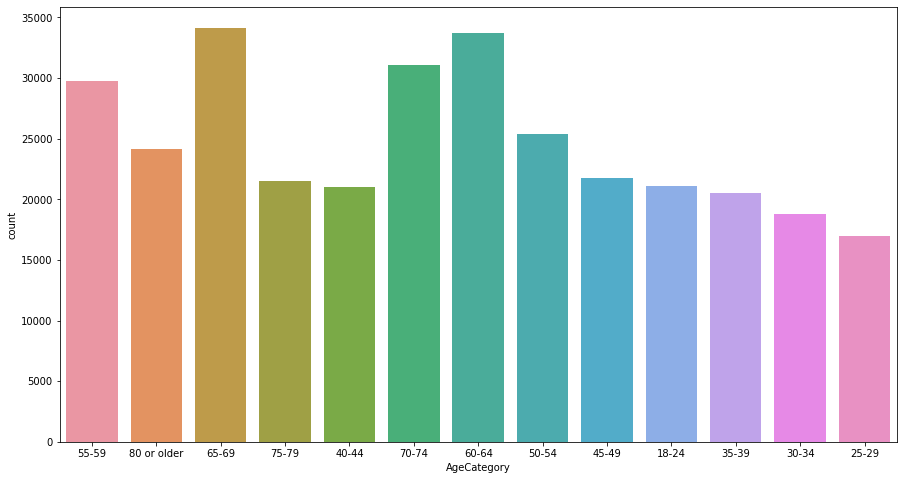

In [9]:
plt.figure(figsize=(15,8))
sns.countplot(df['AgeCategory'])
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SleepTime', ylabel='Density'>

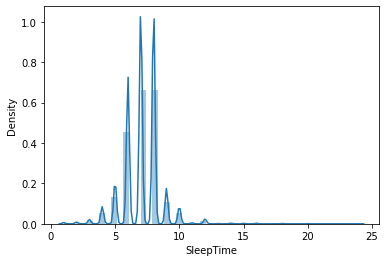

In [10]:
sns.distplot(df['SleepTime'])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PhysicalHealth', ylabel='Density'>

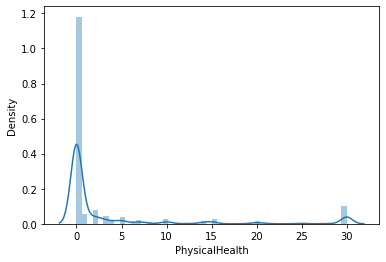

In [11]:
sns.distplot(df['PhysicalHealth'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Stroke', ylabel='count'>

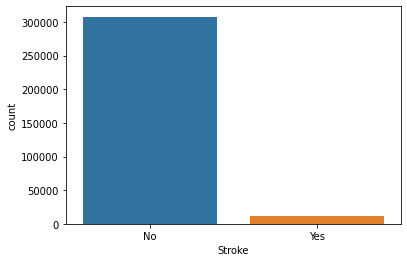

In [12]:
sns.countplot(df['Stroke'])

**Race feature is not important, so we will drop it**

In [13]:
df.drop(columns=['Race'], inplace=True)

**Check the values in every feature**

In [14]:
for i in df.columns:
    print(df[i].value_counts())
    print('***************************************\n')

No     292422
Yes     27373
Name: HeartDisease, dtype: int64
***************************************

26.63    3762
27.46    2767
27.44    2723
24.41    2696
27.12    2525
         ... 
59.85       1
50.59       1
92.53       1
62.95       1
46.56       1
Name: BMI, Length: 3604, dtype: int64
***************************************

No     187887
Yes    131908
Name: Smoking, dtype: int64
***************************************

No     298018
Yes     21777
Name: AlcoholDrinking, dtype: int64
***************************************

No     307726
Yes     12069
Name: Stroke, dtype: int64
***************************************

0.0     226589
30.0     19509
2.0      14880
1.0      10489
3.0       8617
5.0       7606
10.0      5453
15.0      5012
7.0       4629
4.0       4468
20.0      3216
14.0      2893
6.0       1270
25.0      1164
8.0        924
21.0       626
12.0       605
28.0       446
29.0       204
9.0        180
18.0       167
16.0       135
27.0       124
17.0       110
13.0   

**Convert from Categorical to Numerical manually**

In [15]:
cols_yes__no_values = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'PhysicalActivity',
                       'Asthma', 'KidneyDisease', 'SkinCancer']
yes__no_values = {'No':0, 'Yes':1}
for i in range(0, len(cols_yes__no_values)):
    df[cols_yes__no_values[i]] = df[cols_yes__no_values[i]].replace(yes__no_values)

In [16]:
sex = {'Female':0, 'Male':1}
df['Sex'] = df['Sex'].replace(sex)

ageCategory= {'18-24':0, '25-29':1, '30-34':2, '35-39':3, '40-44':4, '45-49':5, '50-54':6, '55-59':7, '60-64':8,
             '65-69':9, '70-74':10, '75-79':11, '80 or older':12}
df['AgeCategory'] = df['AgeCategory'].replace(ageCategory)

genHealth = {'Poor':0, 'Fair':1, 'Good':2, 'Very good':3, 'Excellent':4}
df['GenHealth'] = df['GenHealth'].replace(genHealth)

diabetic = {'No':0, 'No, borderline diabetes':1, 'Yes (during pregnancy)':2, 'Yes':3}
df['Diabetic'] = df['Diabetic'].replace(diabetic)

**Because data is imbalancing we will do balancing for data**

In [17]:
df_majority_0 = df[(df['HeartDisease']==0)] 
df_minority_1 = df[(df['HeartDisease']==1)] 

df_minority_upsampled = resample(df_minority_1, 
                                 replace=True,    
                                 n_samples= 292225, 
                                 random_state=42) 

df_upsampled = pd.concat([df_minority_upsampled, df_majority_0])

**Correlation among features**

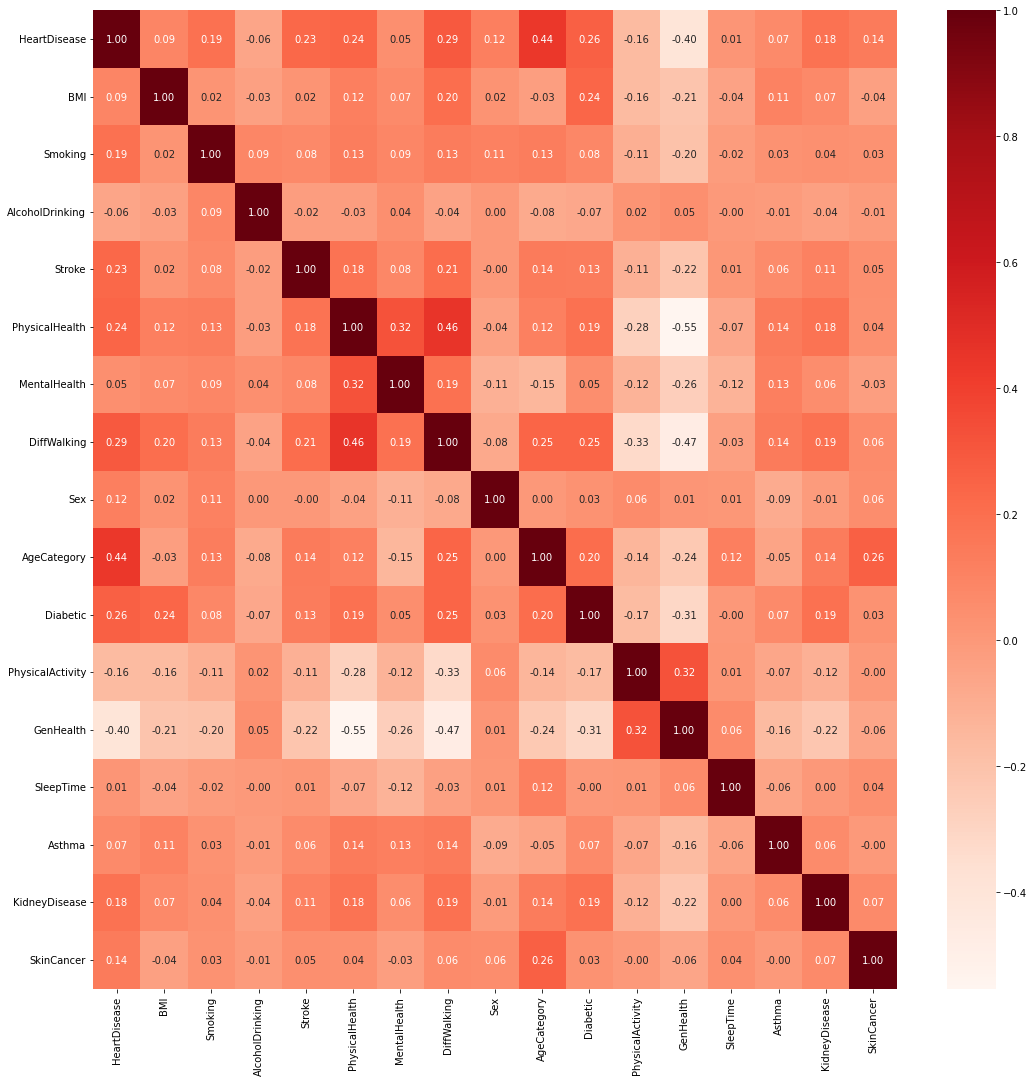

In [18]:
plt.figure(figsize=(18,18))
cor = df_upsampled.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds, fmt='.2f')
plt.show()

**Splitting data and preparing it for modeling**

In [19]:
X = df_upsampled.drop(columns='HeartDisease')
y = df_upsampled['HeartDisease']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.95, shuffle=True)

**Gradient Boosting Classifier**

In [29]:
df_upsampled.tail()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
319789,0,22.22,0,0,0,0.0,0.0,0,0,0,0,1,4,8.0,0,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,1,3,0,1,3,5.0,1,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,0,5,0,1,2,6.0,0,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,0,1,0,0,2,12.0,0,0,0
319794,0,46.56,0,0,0,0.0,0.0,0,0,12,0,1,2,8.0,0,0,0


In [23]:
GBCModel = GradientBoostingClassifier(n_estimators=100, max_depth=15, learning_rate=0.4, random_state=44)
GBCModel.fit(X_train, y_train)
print('GBCModel Train Score is : ' , GBCModel.score(X_train, y_train))
print('GBCModel Test Score is : ' , GBCModel.score(X_test, y_test))

GBCModel Train Score is :  0.995363818701005
GBCModel Test Score is :  0.9746861423733452


In [26]:

features = np.array([[35.43,0,1,1,0.0,0.0,1,0,12,0,0,2,12.0,0,0,0]])
pred = GBCModel.predict(features)
print(pred)

[1]


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [27]:
features = np.array([[46.56,0,0,0,0.0,0.0,0,0,12,0,1,2,8.0,0,0,0]])
pred = GBCModel.predict(features)
print(pred)

[0]


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [28]:
features = np.array([[28.07,0,1,0,0.0,0.0,0,1,11,0,1,4,8.0,0,0,1]])
pred = GBCModel.predict(features)
print(pred)

[1]


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [30]:
features = np.array([[29.84,1,0,0,0.0,0.0,0,1,3,0,1,3,5.0,1,0,0]])
pred = GBCModel.predict(features)
print(pred)

[0]


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [52]:

features = np.array([[46.56,0,0,0,0.0,0.0,0,0,12,0,1,2,8.0,0,0,0]])
pred = GBCModel.predict(features)
print(pred)

[0]


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [31]:
import pickle
pickle.dump(GBCModel, open('model.pkl', 'wb'))